In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from search_optimization_tools.structures import Node
from search_optimization_tools.routing import cost

# Load nodes and edges
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "S"])

edges = [
    ("A", "B", {"weight": 4}),
    ("A", "C", {"weight": 3}),
    ("A", "S", {"weight": 2}),
    ("B", "D", {"weight": 3}),
    ("B", "S", {"weight": 4}),
    ("C", "E", {"weight": 4}),
    ("C", "D", {"weight": 5}),
    ("D", "E", {"weight": 6}),
    ("D", "F", {"weight": 5}),
    ("E", "F", {"weight": 7}),
    ("E", "G", {"weight": 3}),
    ("F", "G", {"weight": 3}),
]

G.add_edges_from(edges)


In [5]:
def Beam_Search(G, origin, destination, cost_fn, k=2, expand_kwargs=[], cost_kwargs=[]):
    seen = set()
    seen.add(origin)
    last_beam = None
    pool = set(origin.expand(**expand_kwargs))
    beam = {}
    while beam != last_beam:
        last_beam = beam
        beam = heapq.nsmallest(
            k, pool, key=lambda node: cost_fn(G, node.path(), **cost_kwargs)
        )
        current = beam.pop(0)
        seen.add(current)
        pool.remove(current)
        children = set(current.expand(**expand_kwargs))
        for child in children:
            if child in seen:
                next
            else:
                if child == destination:
                    return child.path()
                beam.append(child)
        pool.update(beam)
    return None


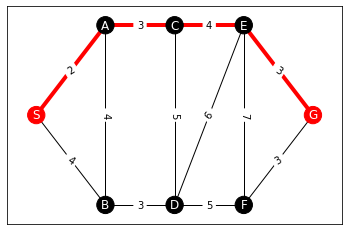

In [6]:
result = Beam_Search(
    G,
    Node(G, "S"),
    Node(G, "G"),
    cost,
    expand_kwargs={"attr_name": "weight", "multigraph": False},
    cost_kwargs={"attr_name": "weight", "multigraph": False},
)

pos = {
    "S": (0, 1),
    "A": (1, 2),
    "B": (1, 0),
    "C": (2, 2),
    "D": (2, 0),
    "E": (3, 2),
    "F": (3, 0),
    "G": (4, 1),
}

node_colors = ["r" if n == "S" or n == "G" else "k" for n in list(G.nodes)]
highlight_edges = list((zip(result[:-1], result[1:])))
highlight_edges = [tuple(sorted(e)) for e in highlight_edges]
edge_colors = ["r" if e in highlight_edges else "k" for e in list(G.edges)]
edge_widths = [4 if e in highlight_edges else 1 for e in list(G.edges)]
labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_colors,
    font_color="w",
    edge_color=edge_colors,
    width=edge_widths,
)
plt.show()
